
Showing images from start of training:


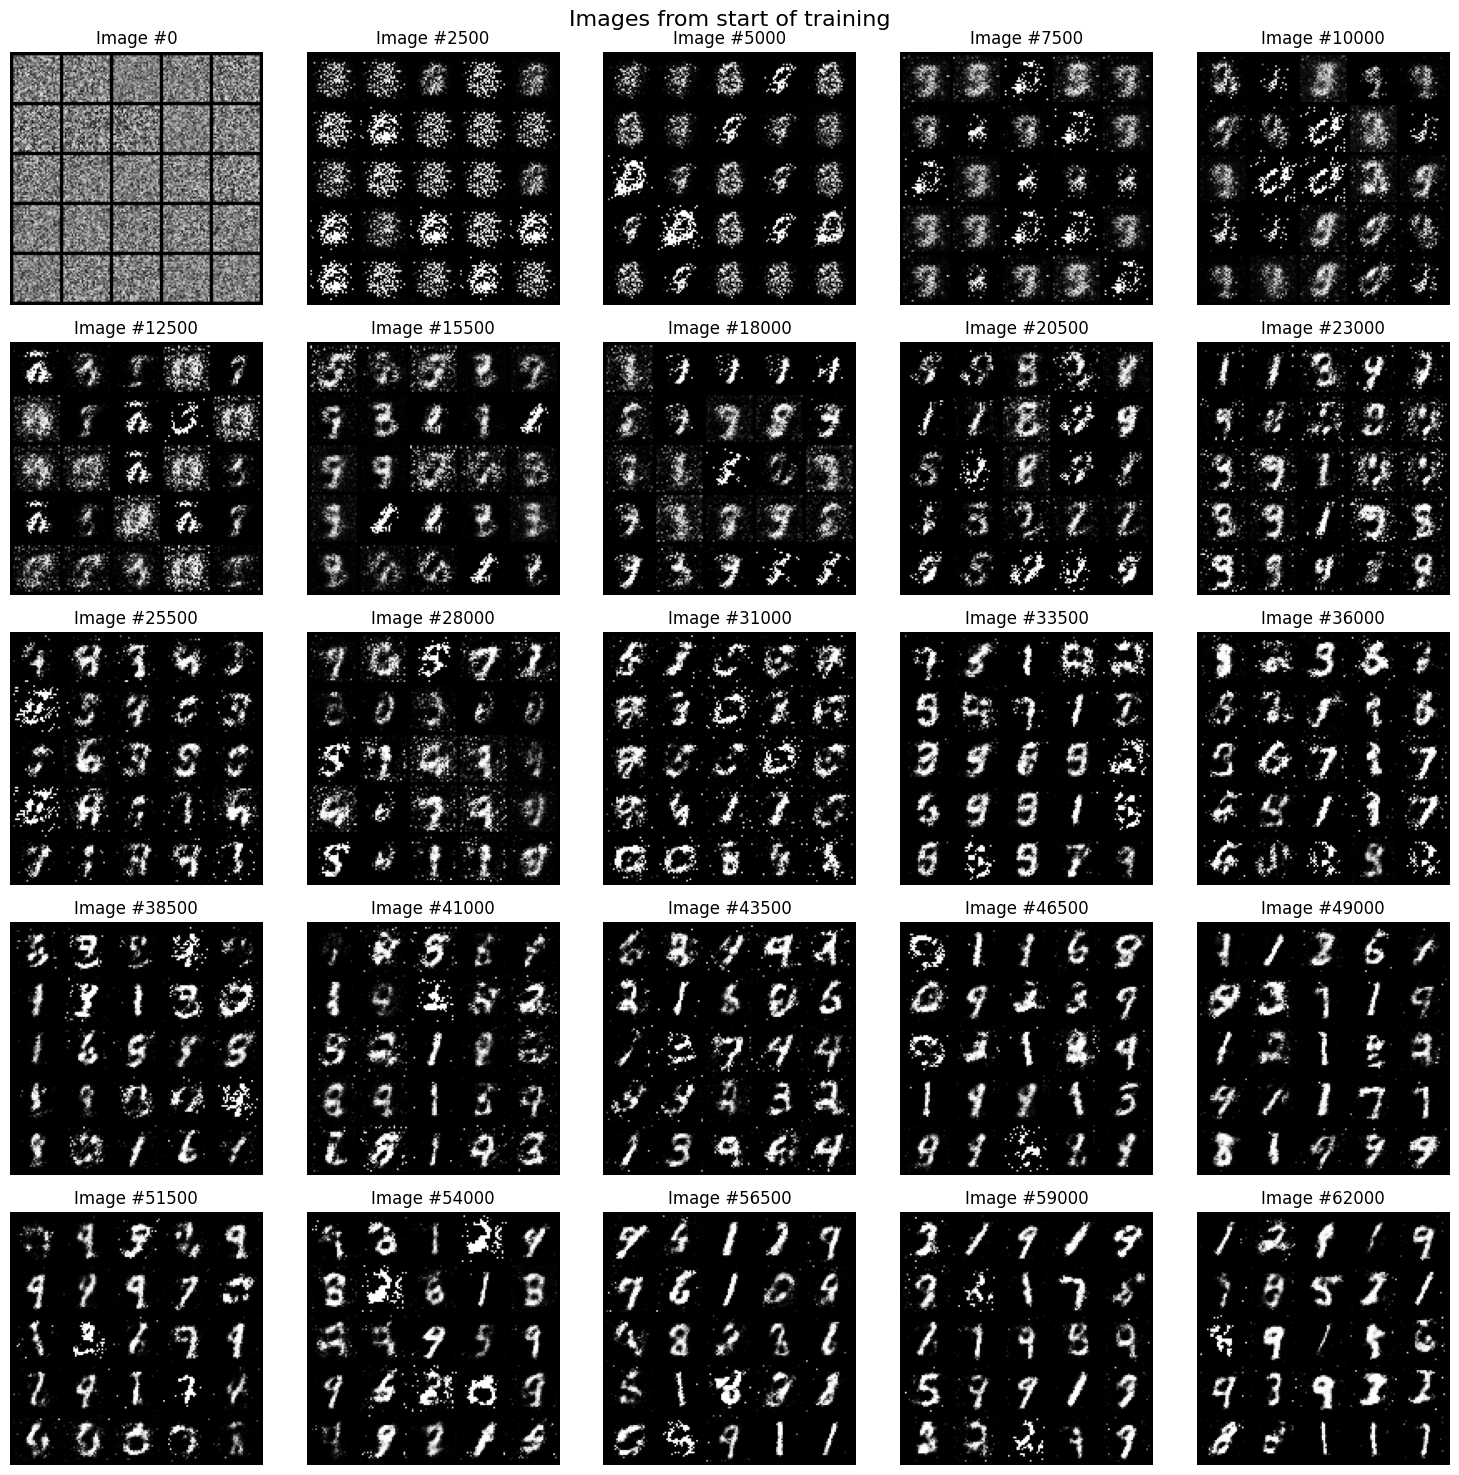


Showing images from middle of training:


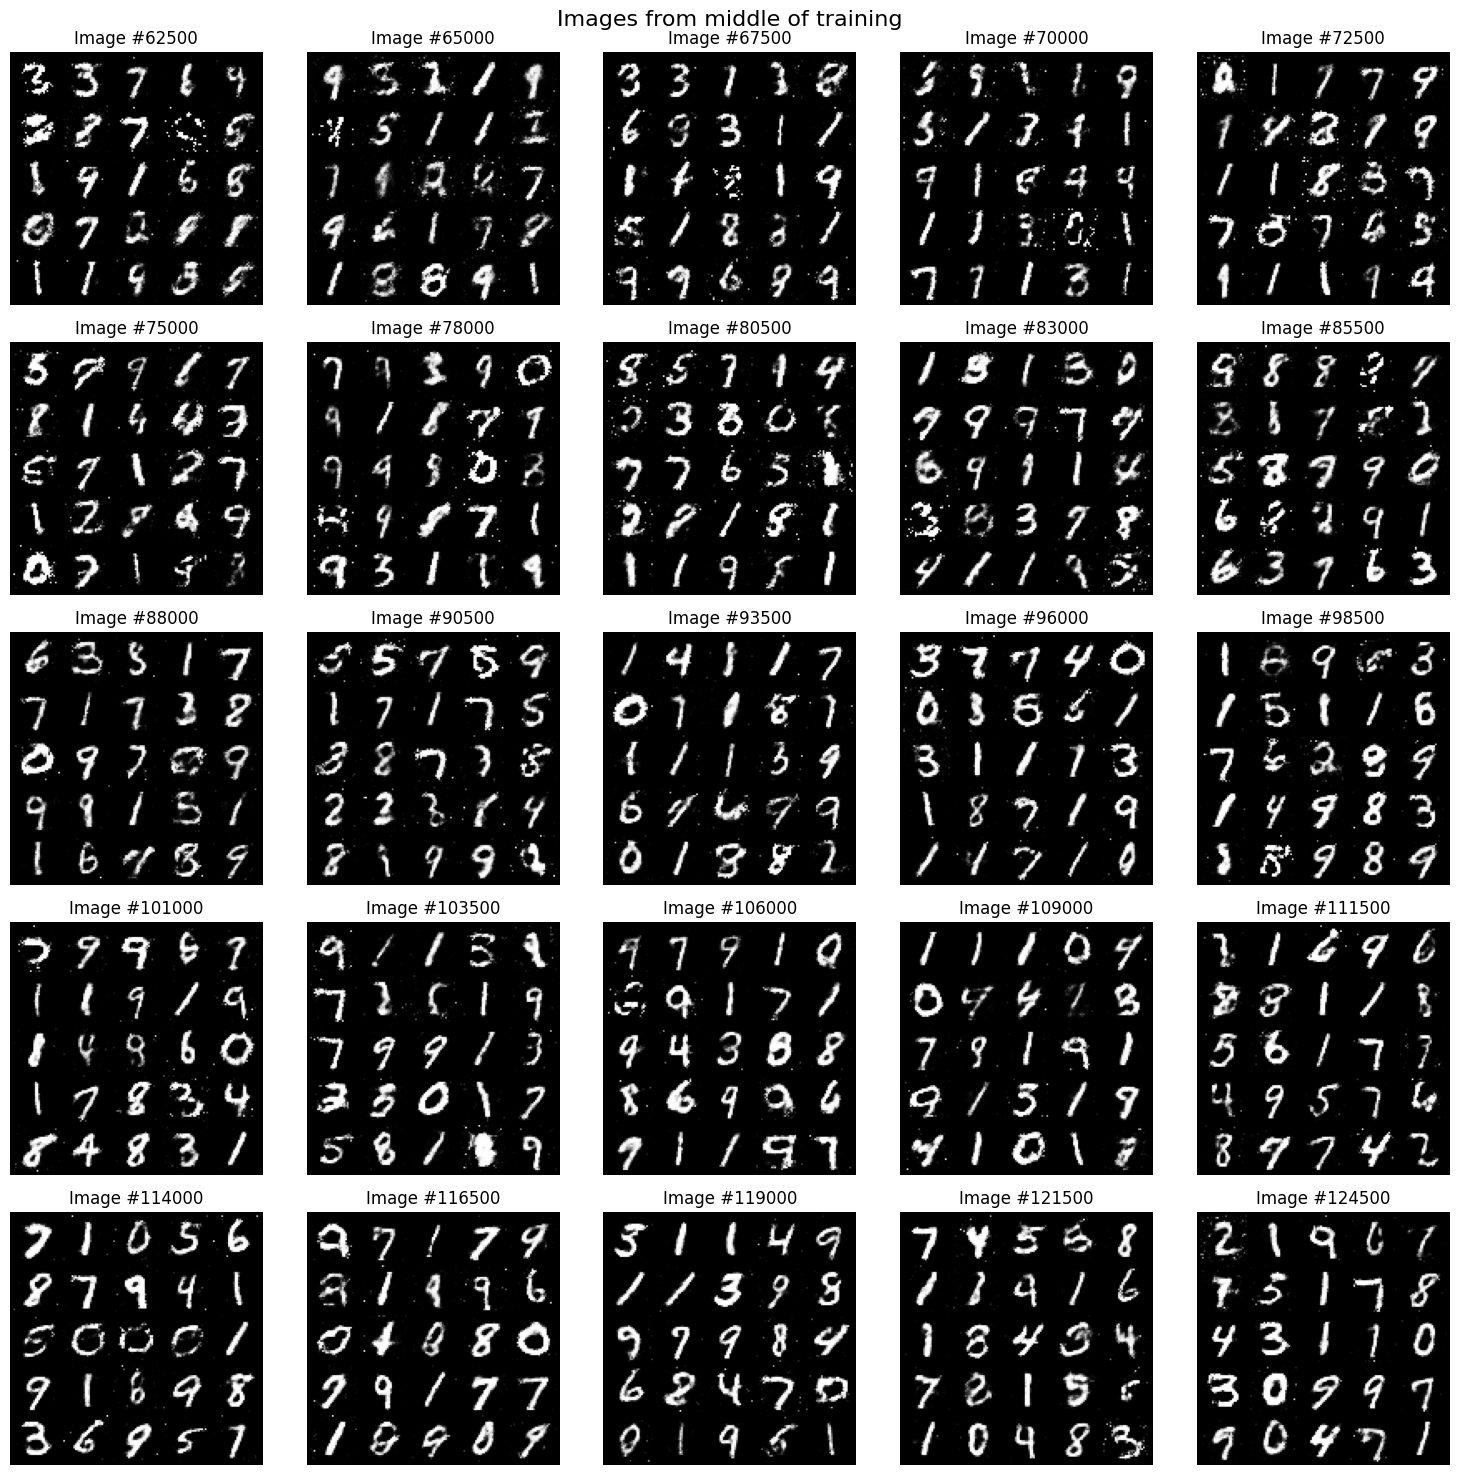


Showing images from end of training:


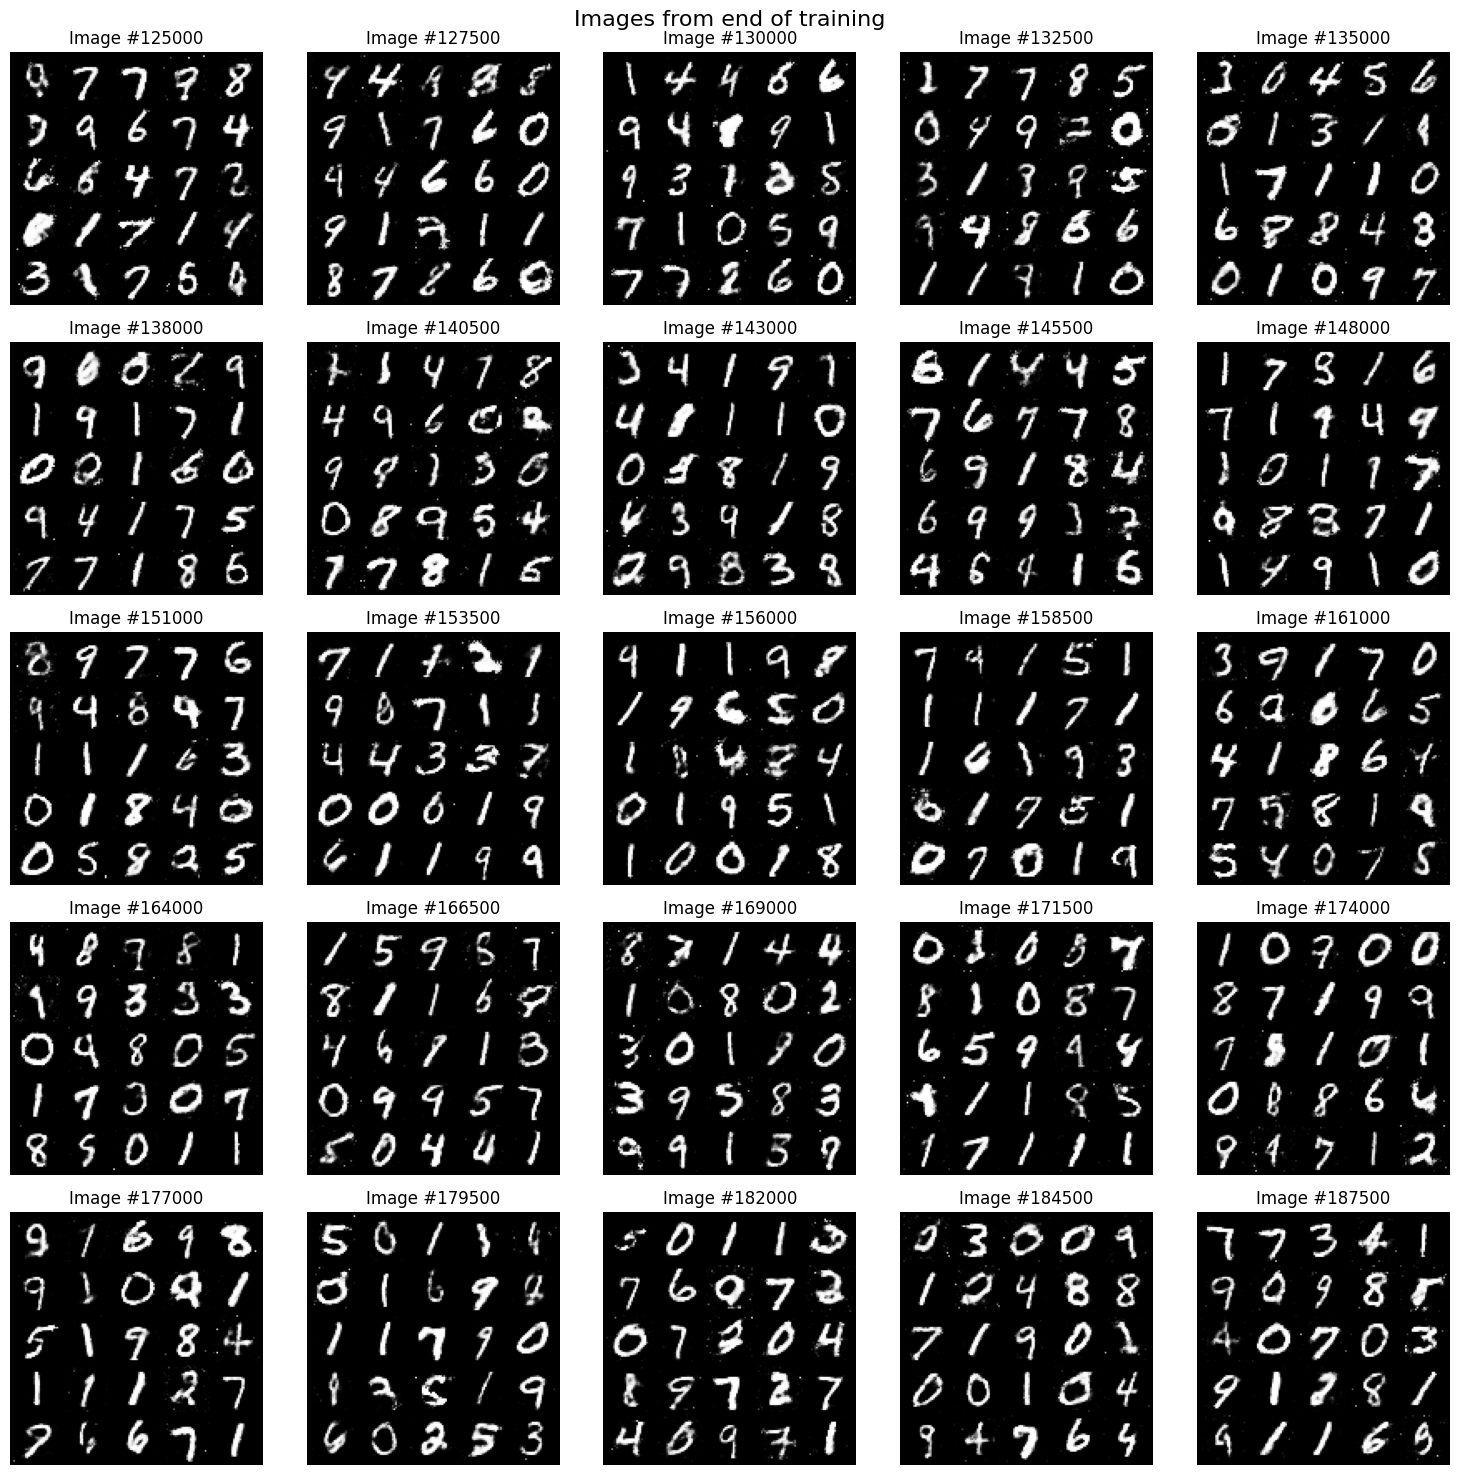

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sample_images(path, stage, n=25):
    # 获取所有图片文件并按编号排序
    images = sorted(os.listdir(path), key=lambda x: int(x.split('.')[0]))
    total_images = len(images)
    
    # 根据训练阶段选择不同的图片范围
    if stage == 'start':
        range_start = 0
        range_end = total_images // 3
    elif stage == 'middle':
        range_start = total_images // 3
        range_end = 2 * total_images // 3
    else:  # end
        range_start = 2 * total_images // 3
        range_end = total_images
        
    # 在选定范围内均匀取样
    selected_indices = np.linspace(range_start, range_end-1, n, dtype=int)
    
    # 创建子图
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    plt.suptitle(f'Images from {stage} of training', size=16)
    
    # 显示图片
    for i, ax in enumerate(axes.flat):
        img_path = os.path.join(path, images[selected_indices[i]])
        img = Image.open(img_path)
        ax.imshow(img)
        # 显示图片编号
        img_number = int(images[selected_indices[i]].split('.')[0])
        ax.set_title(f'Image #{img_number}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(f'images_{stage}.pdf')
    plt.show()

# 分别显示训练开始、中间和结束时的图片
stages = ['start', 'middle', 'end']
for stage in stages:
    print(f"\nShowing images from {stage} of training:")
    sample_images('images', stage)

/var/folders/56/_22r0g6x60707mv3bt3xwgwc0000gn/T/ipykernel_68457/3430622972.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("mnist_

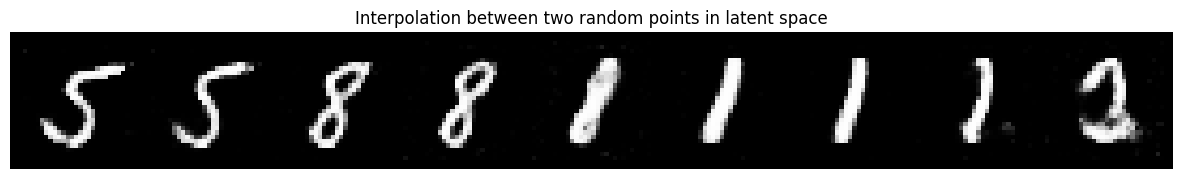

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from my_gan import Generator

# 加载训练好的生成器
def load_generator(latent_dim=100):
    generator = Generator(latent_dim)
    generator.load_state_dict(torch.load("mnist_generator.pt"))
    generator.eval()
    return generator

def interpolate_latent_space(generator, z1, z2, n_steps=7):
    """
    在潜空间中进行线性插值
    
    Args:
        generator: 训练好的生成器模型
        z1: 起始点的潜向量
        z2: 终止点的潜向量
        n_steps: 插值步数（不包括起始点和终止点）
    """
    device = next(generator.parameters()).device
    generator.eval()
    
    # 生成插值系数
    alphas = np.linspace(0, 1, n_steps + 2)
    
    # 存储所有生成的图像
    images = []
    
    with torch.no_grad():
        for alpha in alphas:
            # 线性插值
            z = z1 * (1 - alpha) + z2 * alpha
            # 生成图像
            img = generator(z)
            images.append(img)
    
    # 将所有图像拼接成一个batch
    images = torch.cat(images, dim=0)
    
    # 创建网格显示
    grid = make_grid(images, nrow=9, normalize=True, value_range=(-1, 1))
    
    # 转换为numpy数组用于显示
    grid = grid.cpu().permute(1, 2, 0).numpy()
    
    return grid

# 生成并显示插值结果
latent_dim = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 加载生成器
generator = load_generator(latent_dim).to(device)

# 生成两个随机潜向量
z1 = torch.randn(1, latent_dim).to(device)
z2 = torch.randn(1, latent_dim).to(device)

# 进行插值
interpolated_images = interpolate_latent_space(generator, z1, z2)

# 显示结果
plt.figure(figsize=(15, 3))
plt.imshow(interpolated_images)
plt.axis('off')
plt.title('Interpolation between two random points in latent space')
plt.savefig('interpolation.pdf')
plt.show()


/var/folders/56/_22r0g6x60707mv3bt3xwgwc0000gn/T/ipykernel_68457/3624767786.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("mnist_

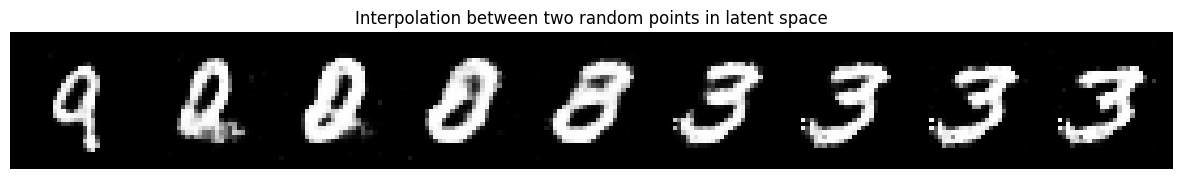

In [5]:
# 生成并显示插值结果
latent_dim = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 加载生成器
generator = load_generator(latent_dim).to(device)

# 生成两个随机潜向量
z1 = torch.randn(1, latent_dim).to(device)
z2 = torch.randn(1, latent_dim).to(device)

# 进行插值
interpolated_images = interpolate_latent_space(generator, z1, z2)

# 显示结果
plt.figure(figsize=(15, 3))
plt.imshow(interpolated_images)
plt.axis('off')
plt.title('Interpolation between two random points in latent space')
plt.show()